# Retail Sales Data - Exploratory Data Analysis

This project performs EDA on a retail sales dataset to uncover insights into customer behavior, product performance, and sales trends. Visualizations and statistical summaries are used to inform business decisions.


### **Step 1: Import Libraries**



We start by importing the necessary libraries for data analysis and visualization:
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for data visualization.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline


### **Step 2: Load the dataset**

The dataset is loaded using pandas. We'll display the first few and last few rows to understand the structure and content of the data.

In [40]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
5,6,4/25/2023,CUST006,Female,45,Beauty,1,30,30
6,7,3/13/2023,CUST007,Male,46,Clothing,2,25,50
7,8,2/22/2023,CUST008,Male,30,Electronics,4,25,100
8,9,12/13/2023,CUST009,Male,63,Electronics,2,300,600
9,10,10/7/2023,CUST010,Female,52,Clothing,4,50,200


In [41]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150
999,1000,4/12/2023,CUST1000,Male,47,Electronics,4,30,120


In [42]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### **Step 3:** Data Cleaning


We check for missing values and duplicate rows. If found, we handle them appropriately. We also ensure the 'Date' column is in datetime format for time-based analysis.

In [43]:
# Check for nulls
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [44]:
# Check for duplicates
df.duplicated().sum()

0

In [45]:
# Handling missing values (if any)
df.ffill(inplace=True)

In [46]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
# Check data types
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

### **Step 4:** Descriptive Statistics


We generate summary statistics to understand the central tendency, spread, and distribution of the numeric columns. For categorical columns, we use the mode.

In [48]:
# Basic statistics for numeric columns
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [49]:
# Mode for categorical columns
df.mode().iloc[0]

Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

### **Step 5:** Time Series Analysis


To identify trends, we extract the month from the date column and calculate monthly sales totals. This helps us understand seasonal patterns and growth over time.

Aggregate Sales by Month

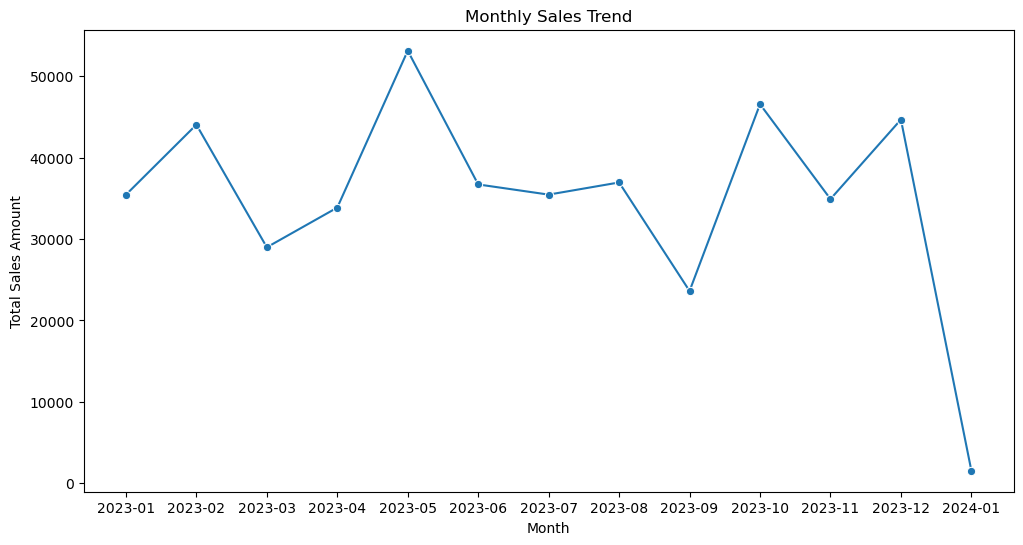

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()



### **Step 6:**. Customer and Product Analysis

**A.** Product Category Analysis

We analyze which product categories contribute the most to sales and revenue.

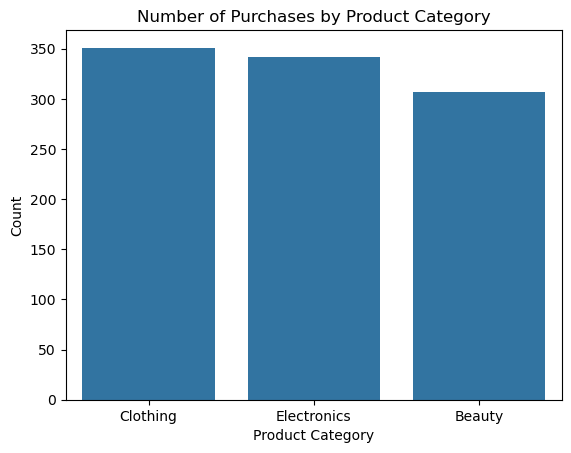

In [51]:
category_counts = df['Product Category'].value_counts()           #Counts how many times each product category was purchased.
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


**B.** Customer Demographics

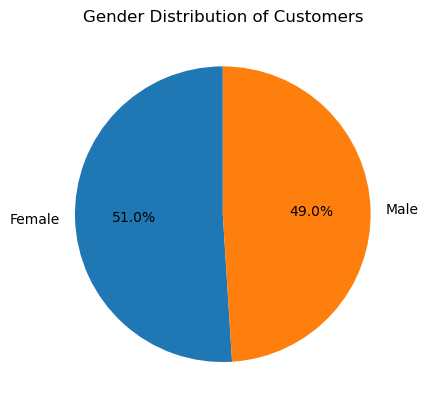

In [52]:
# Gender distribution
gender_counts = df['Gender'].value_counts()                                           #Count how many times each gender appears
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Customers')
plt.show()


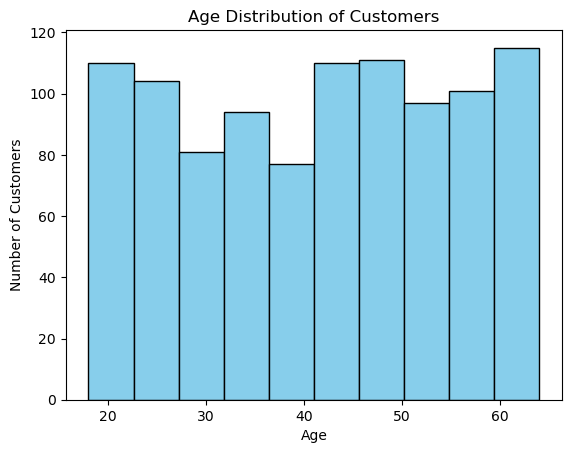

In [36]:
# Age distribution
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


**C.** Customer Purchasing Behavior

In [53]:
# Average purchase amount by gender
print(df.groupby('Gender')['Total Amount'].mean())

# Average purchase amount by age group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['<20', '21-30', '31-40', '41-50', '51-60', '61-70'])
print(df.groupby('Age Group')['Total Amount'].mean())


Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
Age Group
<20      551.269841
21-30    467.690476
31-40    497.150259
41-50    424.411765
51-60    454.931818
61-70    357.258065
Name: Total Amount, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_14820\403141611.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age Group')['Total Amount'].mean())


### **Step 7. Visualization:** Heatmap of Sales by Product and Month



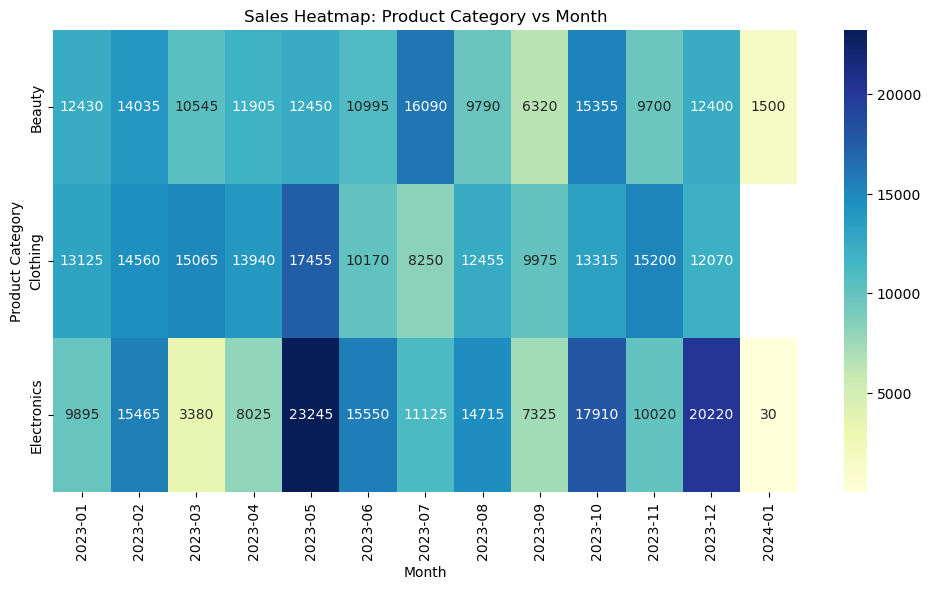

In [38]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

pivot = df.pivot_table(index='Product Category', columns='Month', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales Heatmap: Product Category vs Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()


### **Step 8.** Recommendations (Based on EDA)




         1-Focus marketing on the most popular product categories.

         2-Target age groups and genders that make higher-value purchases.

         3-Stock up on products that sell more in specific months.

         4-Consider promotions during low-sales months to boost revenue.

